In [6]:
# libraries
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import hdbscan
import pickle

### Load Data

In [50]:
data_version='20180808'
with open ('intermediate_data/preprocessed_rent_for_learning_{}.pickle'.format(data_version), 'rb') as f:
    data=pickle.load(f)
with open ('intermediate_data/rent_spec_{}.pickle'.format(data_version), 'rb') as f:
    data0=pickle.load(f)

In [51]:
data = data.dropna()

In [53]:
data = data.astype(float)

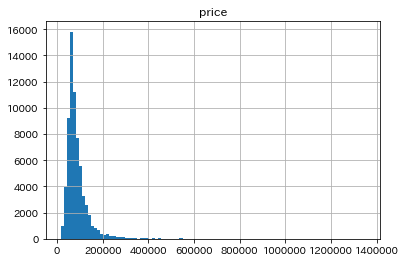

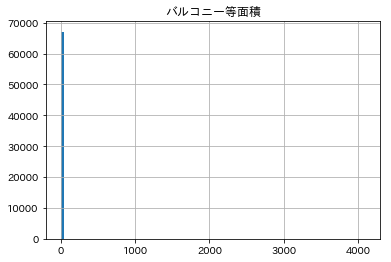

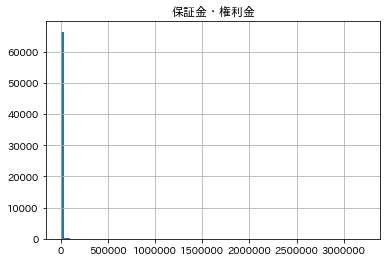

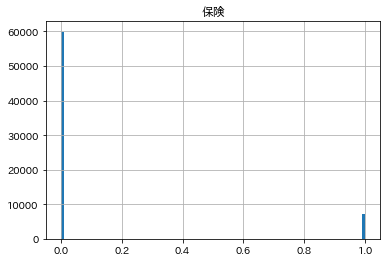

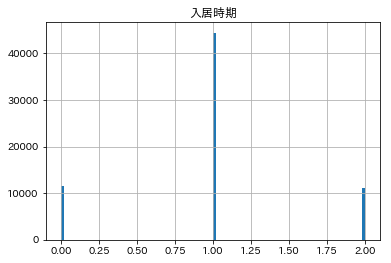

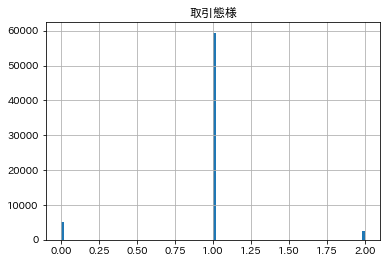

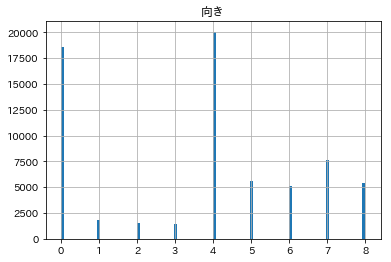

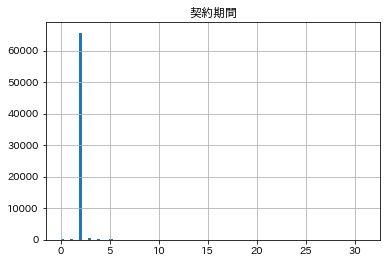

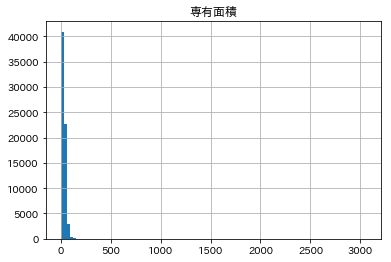

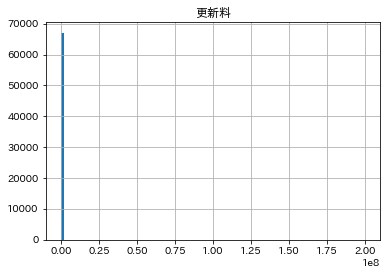

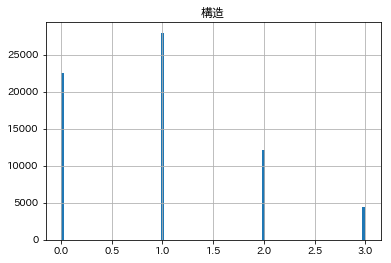

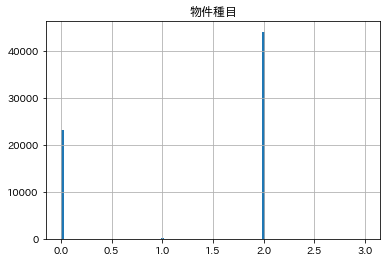

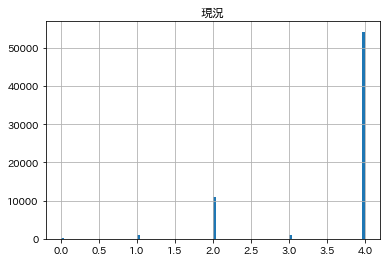

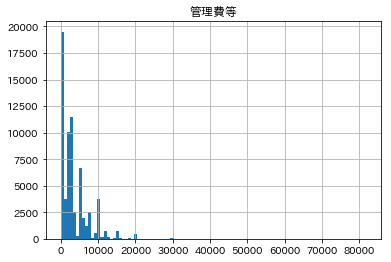

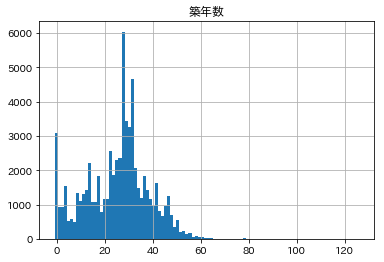

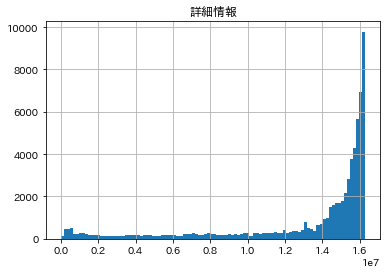

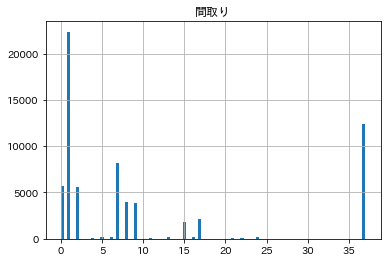

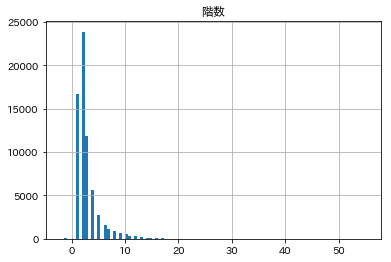

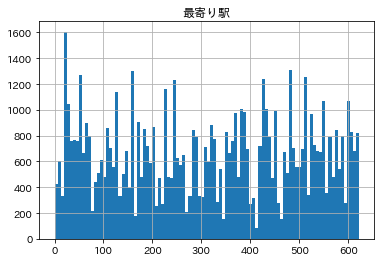

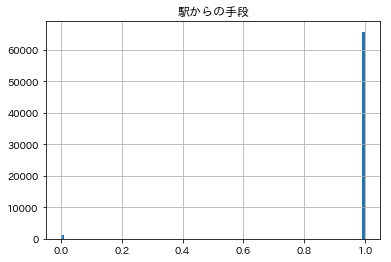

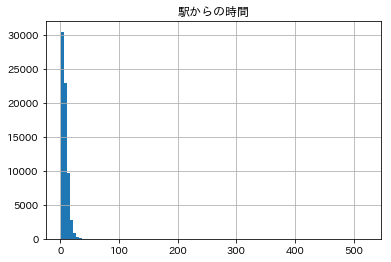

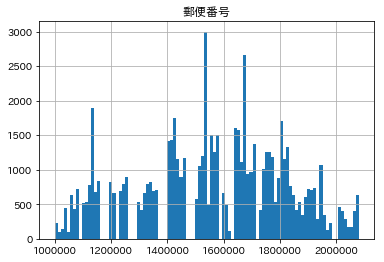

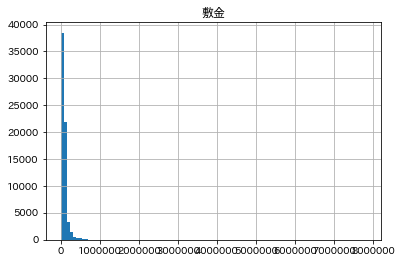

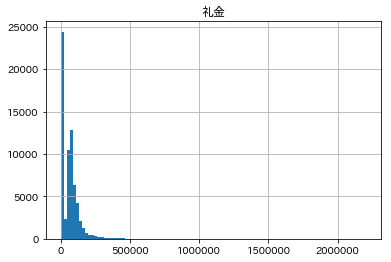

In [58]:
for col in data:
    data[col].hist(bins = 100)
    plt.title(col)
    plt.show()

### standardization

In [30]:
sc = StandardScaler()
data_std = sc.fit_transform(data)
exp=data_std[:,1:]
target=data_std[:,1]

### correlation heatmap

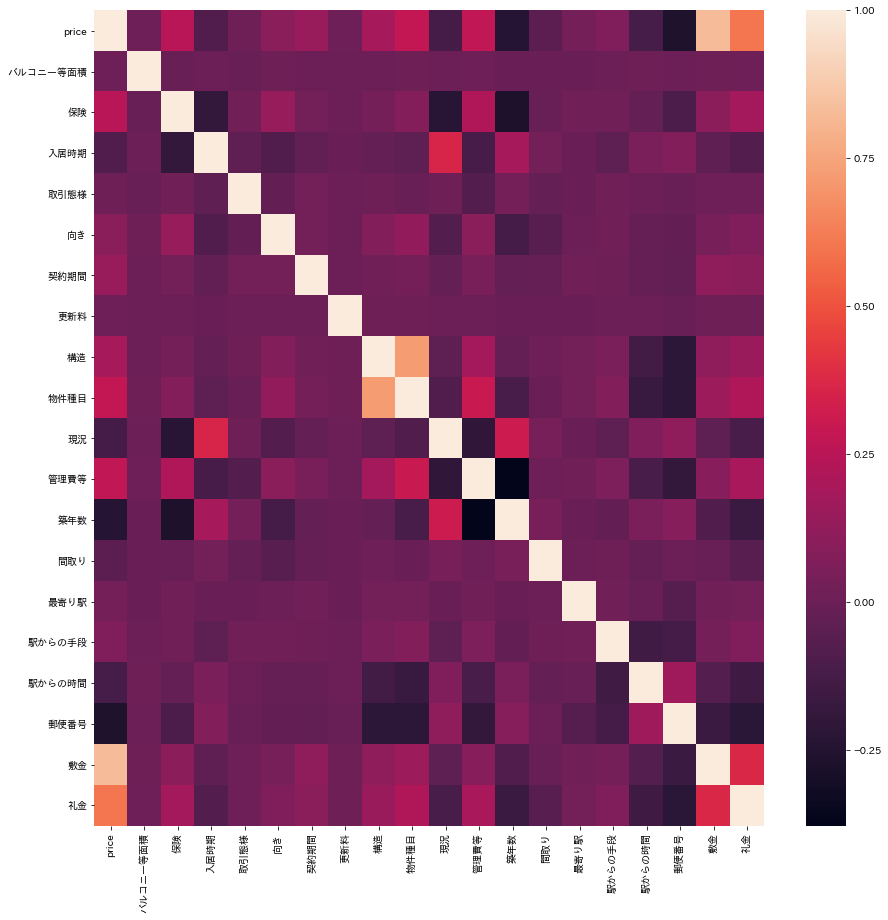

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
plt.show()

### pairplot

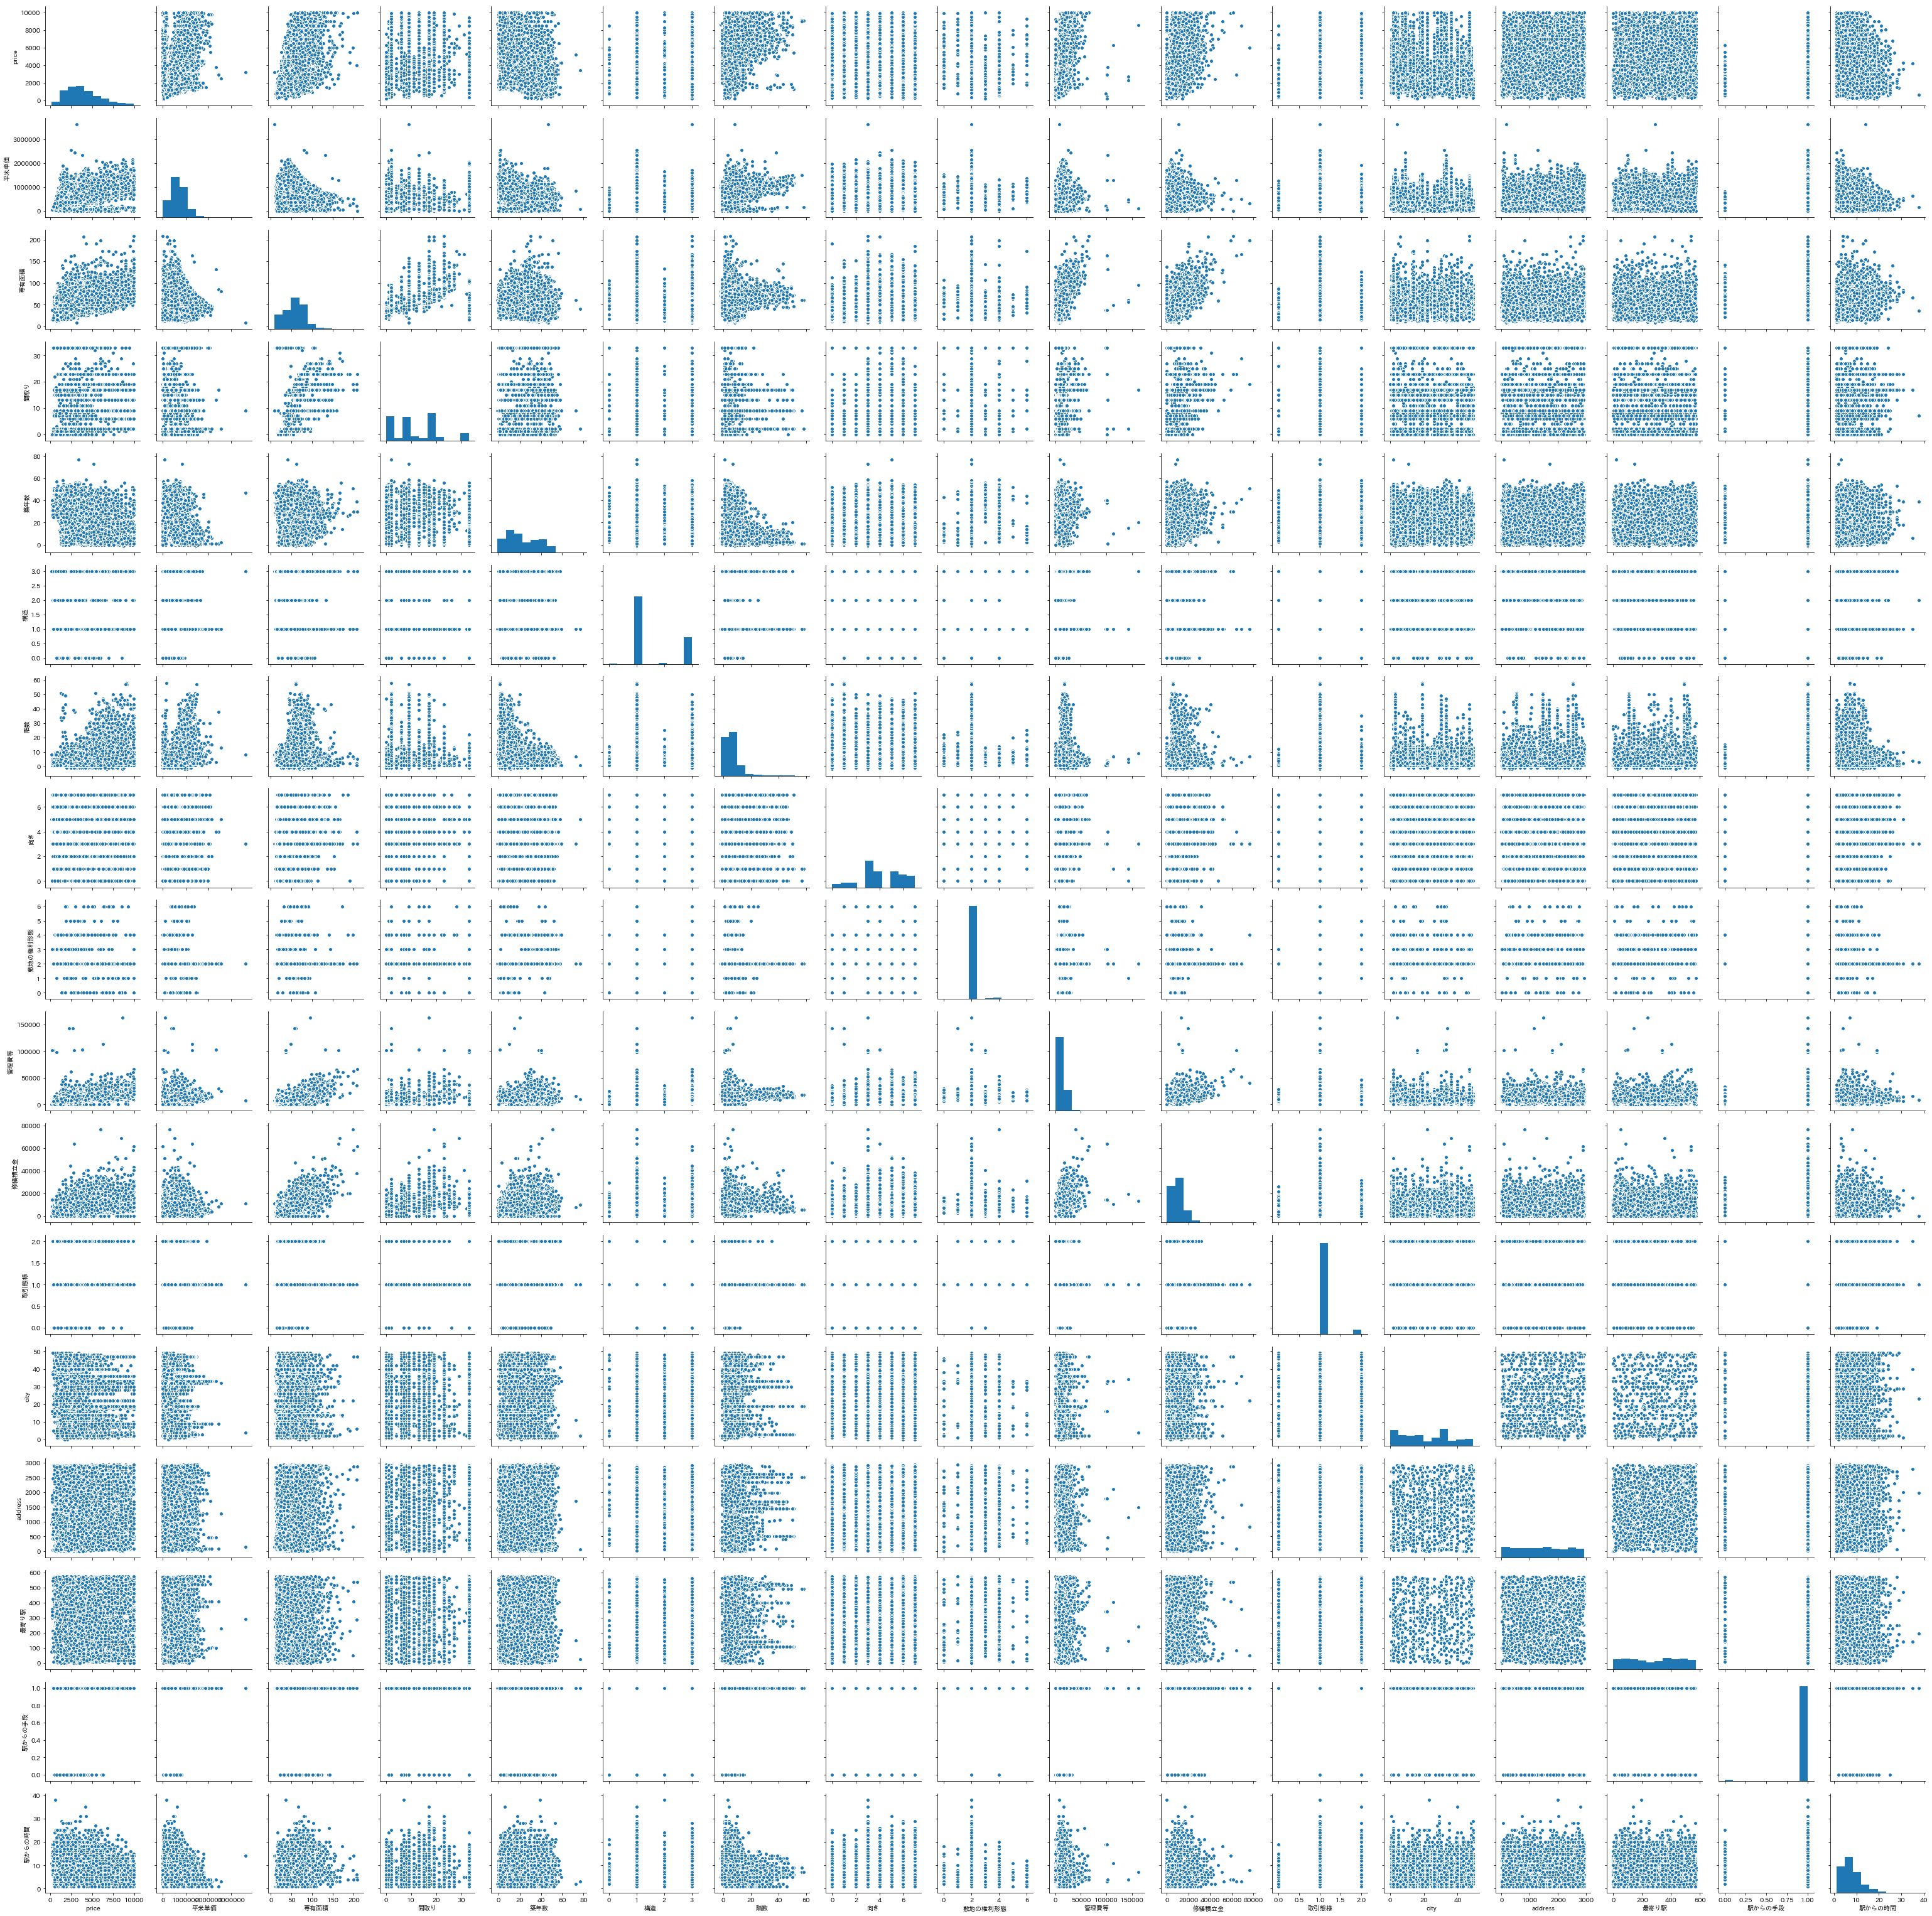

In [14]:
sns.pairplot(df)

### boxplot

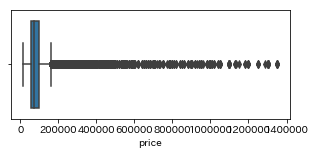

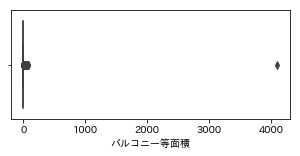

TypeError: cannot perform reduce with flexible type

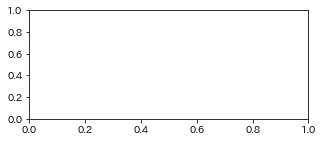

In [33]:
for c in data:
    plt.figure(figsize=(5,2))
    sns.boxplot(data[c])
    plt.show()

### PCA

In [34]:
X_reduced = PCA(n_components=2).fit_transform(exp)

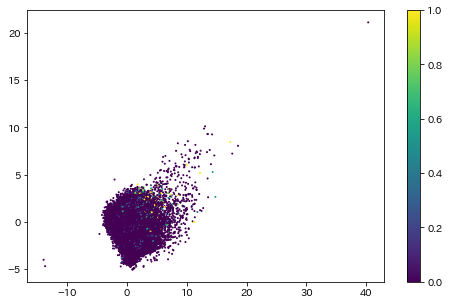

In [35]:
plt.figure(figsize=(8,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1,c=target,vmax=1,vmin=0)
plt.colorbar()
plt.show()

### TSNE

In [36]:
X_reduced = TSNE(n_components=2, random_state=0).fit_transform(exp)

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1,c=target,vmax=1,vmin=0)
plt.colorbar()
plt.show()

### HDBSCAN

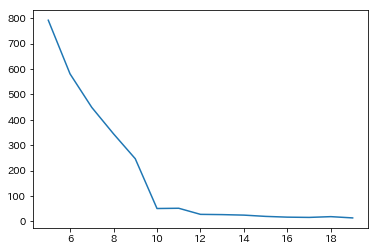

In [17]:
cl=[]
size=range(5,20)
for i in size:
    clusterer = hdbscan.HDBSCAN(min_cluster_size=i, gen_min_span_tree=True)
    clusterer.fit(X_reduced)
    cl.append(clusterer.labels_.max())
plt.plot(size,cl)
plt.show()

the number of cluster=29


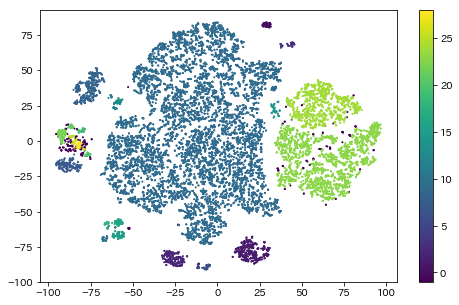

In [77]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=12, gen_min_span_tree=True)
clusterer.fit(X_reduced)
cls=clusterer.labels_
cls_num=cls.max()-cls.min()
print('the number of cluster={}'.format(cls_num))

plt.figure(figsize=(8,5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],s=1,c=cls)
plt.colorbar()
plt.show()

In [78]:
cls=cls.reshape(-1,1)
data1=np.concatenate((data,cls),axis=1)
col=list(df.columns)
col.append('cluster')
df1=pd.DataFrame(dict(zip(col,data1.T)))

In [79]:
df1.groupby('cluster').count()

,price,修繕積立金,取引態様,向き,専有面積,平米単価,敷地の権利形態,構造,管理費等,築年数,間取り,階数
cluster,,,,,,,,,,,,
-1.0,244,244,244,244,244,244,244,244,244,244,244,244
0.0,69,69,69,69,69,69,69,69,69,69,69,69
1.0,395,395,395,395,395,395,395,395,395,395,395,395
2.0,231,231,231,231,231,231,231,231,231,231,231,231
3.0,46,46,46,46,46,46,46,46,46,46,46,46
4.0,19,19,19,19,19,19,19,19,19,19,19,19
5.0,22,22,22,22,22,22,22,22,22,22,22,22
6.0,43,43,43,43,43,43,43,43,43,43,43,43
7.0,193,193,193,193,193,193,193,193,193,193,193,193


-------cluster-1--------
count=244
mean=3045.4
std=2093.9
iqr=3005.0
st_range=-1142.4 ~ 7233.2
iqr_range=-3112.5 ~ 8907.5
-----------------------------


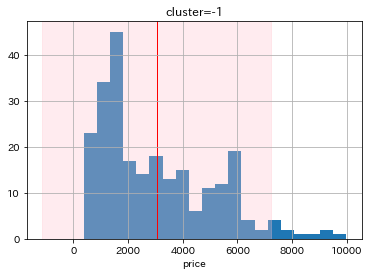

-------cluster0--------
count=69
mean=2617.2
std=1551.3
iqr=2100.0
st_range=-485.4 ~ 5719.7
iqr_range=-1670.0 ~ 6730.0
-----------------------------


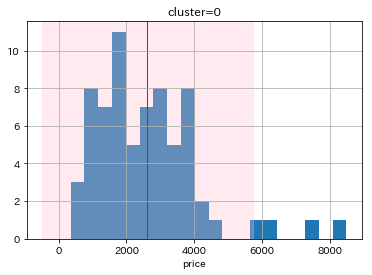

-------cluster1--------
count=395
mean=3458.1
std=1832.8
iqr=2100.0
st_range=-207.4 ~ 7123.7
iqr_range=-1070.0 ~ 7330.0
-----------------------------


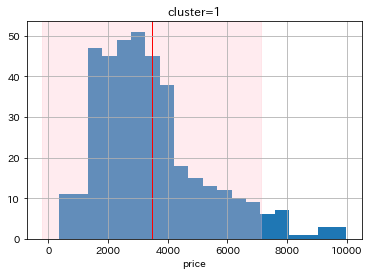

-------cluster2--------
count=231
mean=3345.6
std=1339.2
iqr=1500.0
st_range=667.2 ~ 6024.0
iqr_range=230.0 ~ 6230.0
-----------------------------


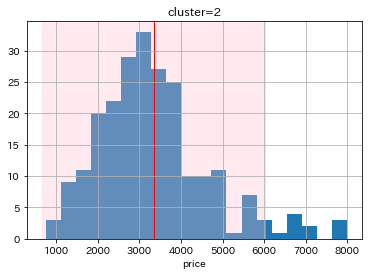

-------cluster3--------
count=46
mean=5622.5
std=2292.3
iqr=3715.0
st_range=1037.9 ~ 10207.0
iqr_range=-1852.5 ~ 13007.5
-----------------------------


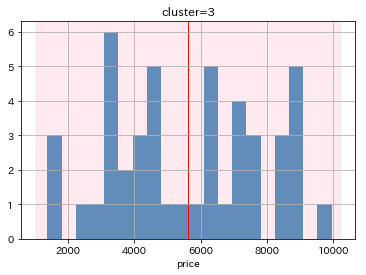

-------cluster4--------
count=19
mean=7071.6
std=2113.3
iqr=3100.0
st_range=2845.1 ~ 11298.1
iqr_range=1040.0 ~ 13440.0
-----------------------------


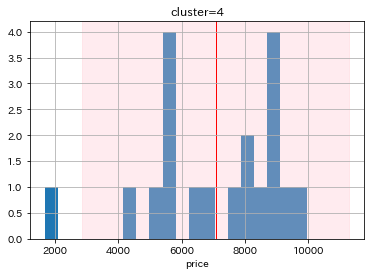

-------cluster5--------
count=22
mean=1767.0
std=696.5
iqr=577.5
st_range=373.9 ~ 3160.1
iqr_range=513.8 ~ 2823.8
-----------------------------


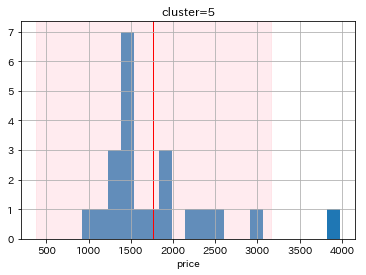

-------cluster6--------
count=43
mean=1430.9
std=706.7
iqr=695.5
st_range=17.4 ~ 2844.3
iqr_range=-18.8 ~ 2763.2
-----------------------------


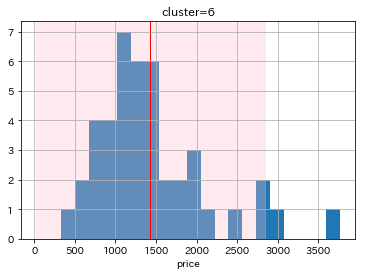

-------cluster7--------
count=193
mean=3017.5
std=1533.3
iqr=1510.0
st_range=-49.0 ~ 6084.0
iqr_range=-285.0 ~ 5755.0
-----------------------------


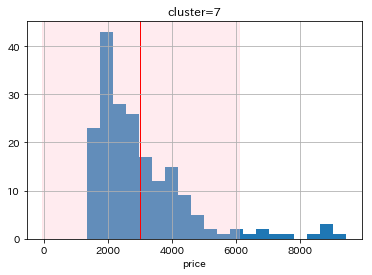

-------cluster8--------
count=408
mean=2101.3
std=1064.7
iqr=1127.5
st_range=-28.2 ~ 4230.8
iqr_range=-311.2 ~ 4198.8
-----------------------------


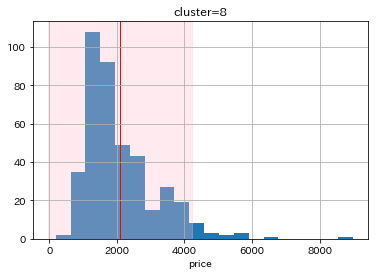

-------cluster9--------
count=9379
mean=4280.4
std=2154.8
iqr=3020.0
st_range=-29.3 ~ 8590.0
iqr_range=-1950.0 ~ 10130.0
-----------------------------


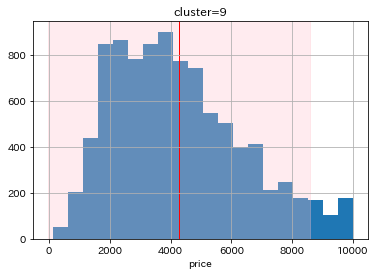

-------cluster10--------
count=36
mean=5294.5
std=2169.9
iqr=4039.5
st_range=954.8 ~ 9634.2
iqr_range=-2761.2 ~ 13396.8
-----------------------------


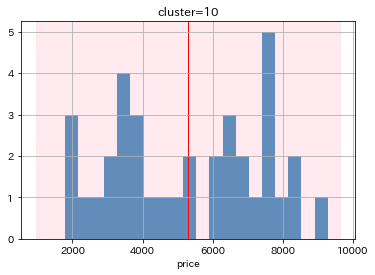

-------cluster11--------
count=15
mean=1849.3
std=1463.1
iqr=895.0
st_range=-1076.8 ~ 4775.5
iqr_range=-197.5 ~ 3382.5
-----------------------------


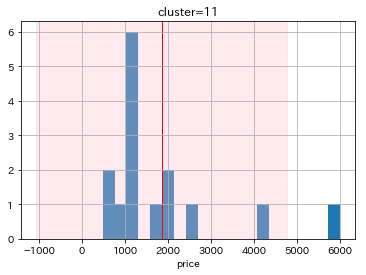

-------cluster12--------
count=20
mean=2311.7
std=1157.3
iqr=1980.0
st_range=-2.9 ~ 4626.3
iqr_range=-1645.0 ~ 6275.0
-----------------------------


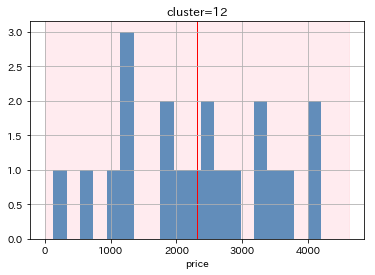

-------cluster13--------
count=54
mean=3485.4
std=1578.2
iqr=1435.8
st_range=328.9 ~ 6641.9
iqr_range=265.6 ~ 6008.6
-----------------------------


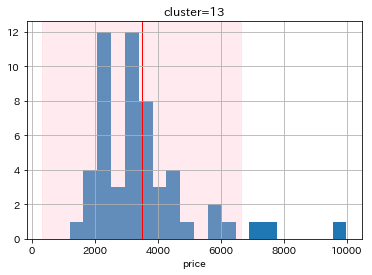

-------cluster14--------
count=54
mean=2644.0
std=823.3
iqr=1182.0
st_range=997.3 ~ 4290.7
iqr_range=225.0 ~ 4953.0
-----------------------------


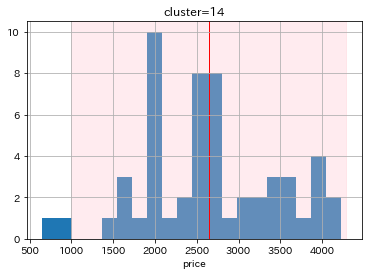

-------cluster15--------
count=94
mean=3368.9
std=1900.8
iqr=2497.5
st_range=-432.6 ~ 7170.5
iqr_range=-1763.8 ~ 8226.2
-----------------------------


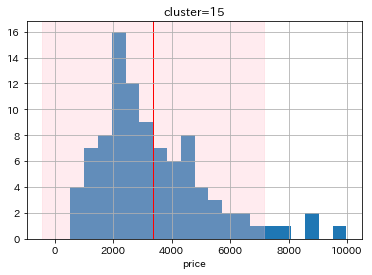

-------cluster16--------
count=64
mean=2864.5
std=1373.4
iqr=1241.5
st_range=117.7 ~ 5611.4
iqr_range=131.2 ~ 5097.2
-----------------------------


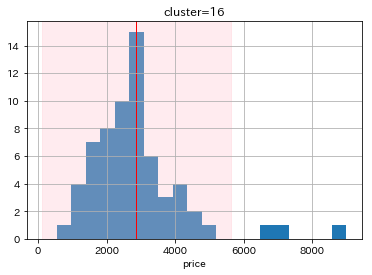

-------cluster17--------
count=14
mean=1685.0
std=1167.6
iqr=747.5
st_range=-650.2 ~ 4020.2
iqr_range=-201.2 ~ 2788.8
-----------------------------


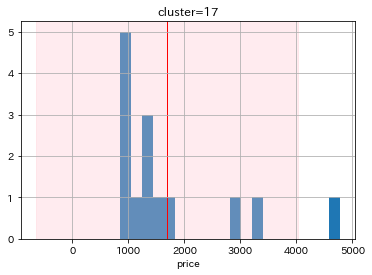

-------cluster18--------
count=28
mean=1370.6
std=774.4
iqr=602.5
st_range=-178.2 ~ 2919.5
iqr_range=-23.8 ~ 2386.2
-----------------------------


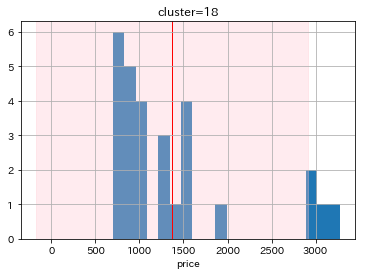

-------cluster19--------
count=39
mean=1271.8
std=748.4
iqr=1040.0
st_range=-225.0 ~ 2768.6
iqr_range=-920.0 ~ 3240.0
-----------------------------


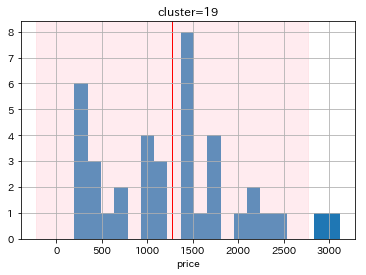

-------cluster20--------
count=30
mean=940.8
std=368.6
iqr=465.0
st_range=203.5 ~ 1678.1
iqr_range=-12.5 ~ 1847.5
-----------------------------


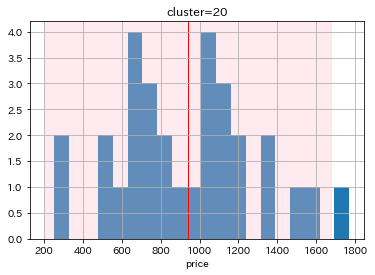

-------cluster21--------
count=30
mean=913.9
std=739.9
iqr=635.0
st_range=-565.9 ~ 2393.7
iqr_range=-602.5 ~ 1937.5
-----------------------------


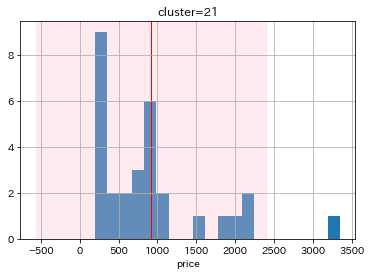

-------cluster22--------
count=95
mean=1472.8
std=812.3
iqr=590.0
st_range=-151.8 ~ 3097.3
iqr_range=105.0 ~ 2465.0
-----------------------------


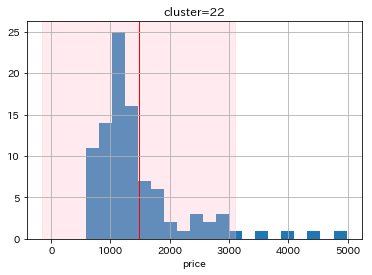

-------cluster23--------
count=2167
mean=4278.3
std=1767.0
iqr=2100.0
st_range=744.4 ~ 7812.3
iqr_range=-70.0 ~ 8330.0
-----------------------------


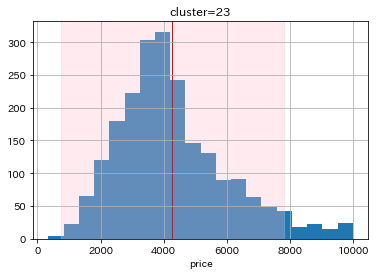

-------cluster24--------
count=1066
mean=3049.6
std=1218.6
iqr=1580.0
st_range=612.4 ~ 5486.9
iqr_range=-170.0 ~ 6150.0
-----------------------------


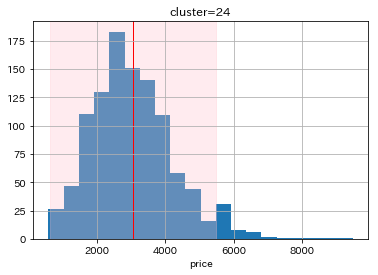

-------cluster25--------
count=23
mean=889.6
std=231.5
iqr=310.0
st_range=426.7 ~ 1352.5
iqr_range=275.0 ~ 1515.0
-----------------------------


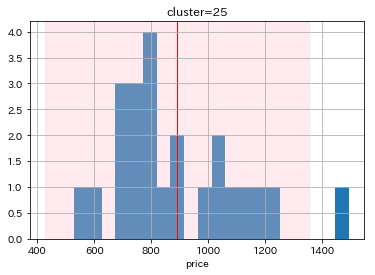

-------cluster26--------
count=26
mean=1018.5
std=190.6
iqr=245.0
st_range=637.2 ~ 1399.7
iqr_range=525.0 ~ 1505.0
-----------------------------


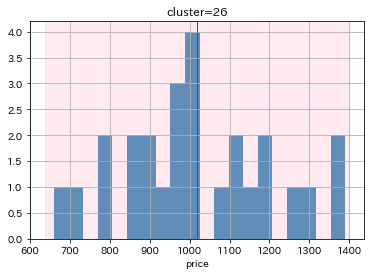

-------cluster27--------
count=12
mean=2004.2
std=689.4
iqr=982.5
st_range=625.3 ~ 3383.1
iqr_range=23.8 ~ 3953.8
-----------------------------


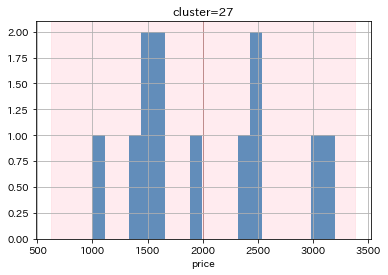

-------cluster28--------
count=41
mean=1104.1
std=366.6
iqr=210.0
st_range=370.9 ~ 1837.4
iqr_range=625.0 ~ 1465.0
-----------------------------


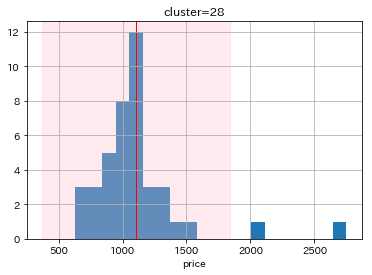

In [80]:
for i in range(-1,cls_num):
    cnt=df1[df1['cluster']==i]['price'].count()
    m=df1[df1['cluster']==i]['price'].mean()
    st=df1[df1['cluster']==i]['price'].std()
    q1=df1[df1['cluster']==i]['price'].quantile(.25)
    q3=df1[df1['cluster']==i]['price'].quantile(.75)
    iqr=q3-q1
    bias=1.5
    st_outlier_min = (m-2*st)
    st_outlier_max = (m+2*st)
    iqr_outlier_min = (q1 - (iqr) * bias)
    iqr_outlier_max = (q3 + (iqr) * bias)
    
    print('-------cluster{}--------'.format(i))
    print('count={}'.format(cnt))
    print('mean={:.1f}'.format(m))
    print('std={:.1f}'.format(st))
    print('iqr={:.1f}'.format(iqr))
    print('st_range={:.1f} ~ {:.1f}'.format(st_outlier_min,st_outlier_max))
    print('iqr_range={:.1f} ~ {:.1f}'.format(iqr_outlier_min,iqr_outlier_max))
    print('-----------------------------')

          
    df1[df1['cluster']==i]['price'].hist(bins=20)
    plt.title('cluster={}'.format(i))
    plt.axvspan(st_outlier_min, st_outlier_max, color='pink', alpha=0.3)
#     plt.axvspan(iqr_outlier_min,iqr_outlier_max, color='blue', alpha=0.1)
    plt.axvspan(m, m, color='red', alpha=1)
    plt.xlabel('price')
    plt.show()